# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
import itertools

In [4]:
from spectral_connectivity import Multitaper, Connectivity
import spectral_connectivity

## Inputs & Data

Explanation of each input and where it comes from.

In [5]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [6]:
CHANNEL_MAP_AND_ALL_TRIALS_DF = pd.read_pickle("./proc/full_baseline_and_trial_lfp_traces.pkl")
MERGED_TRIALS_AND_VIDEO = pd.read_pickle("./proc/trial_SLEAP_and_metadata.pkl")

In [7]:
OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

In [8]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [9]:
TIME_HALFBANDWIDTH_PRODUCT = 2
TIME_WINDOW_DURATION = 1
TIME_WINDOW_STEP = 0.5
RESAMPLE_RATE=1000

In [10]:
MERGED_TRIALS_AND_VIDEO

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,baseline_thorax_velocity,trial_thorax_velocity,trial_chunked_thorax_velocity,baseline_chunked_thorax_velocity,trial_chunked_ephys_timestamp,baseline_chunked_ephys_timestamp,trial_chunked_lfp_index,baseline_chunked_lfp_index,binned_baseline_thorax_velocity,binned_trial_thorax_velocity
0,30950500,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,27998597,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[1.2476140081638165, 1.1366289071218907, 1.068...","[0.18170472850681613, 0.16961378983662276, 0.2...","[0.49872187702582166, 0.5847505450273386, 1.07...","[1.6838472335457935, 1.7550373254126983, 1.372...","[(27998597, 28018597), (28008597, 28028597), (...","[(27798597, 27818597), (27808597, 27828597), (...","[(1399929, 1400929), (1400429, 1401429), (1400...","[(1389929, 1390929), (1390429, 1391429), (1390...","[0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ..."
1,32550496,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,29598593,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[2.7236727895073223, 2.628037603947678, 2.5298...","[0.38577700470932025, 0.16352840888997497, 0.0...","[0.3129891797005337, 0.2588847730730972, 0.210...","[1.458421075097482, 0.5407183310858753, 0.2360...","[(29598593, 29618593), (29608593, 29628593), (...","[(29398593, 29418593), (29408593, 29428593), (...","[(1479929, 1480929), (1480429, 1481429), (1480...","[(1469929, 1470929), (1470429, 1471429), (1470...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,34350494,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,31398591,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[5.210405290871598, 5.31421978904958, 5.379251...","[0.16560567036540477, 0.1278165569746918, 0.09...","[0.19868857983610794, 0.508612732615851, 0.481...","[3.439626522203859, 1.5683251160952123, 1.1535...","[(31398591, 31418591), (31408591, 31428591), (...","[(31198591, 31218591), (31208591, 31228591), (...","[(1569929, 1570929), (1570429, 1571429), (1570...","[(1559929, 1560929), (1560429, 1561429), (1560...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,35950496,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,32998593,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[1.6555785442563817, 1.6866235492876445, 1.664...","[0.6307901161394641, 0.6655381193431421, 0.701...","[0.4673908122355257, 0.39056964369789443, 0.38...","[0.900289992310536, 0.3533926495729531, 0.2807...","[(32998593, 33018593), (33008593, 33028593), (...","[(32798593, 32818593), (32808593, 32828593), (...","[(1649929, 1650929), (1650429, 1651429), (1650...","[(1639929, 1640929), (1640429, 1641429), (1640...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,37450494,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,34498591,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.9562352171082348, 0.8615465705681848, 0.756...","[0.15955796441347841, 0.18843088608181321, 0.2...","[0.23449342689004346, 0.17815867178863123, 0.2...","[0.3903027043299651, 0.397100110767035, 0.8705...","[(34498591, 34518591), 

In [11]:
CHANNEL_MAP_AND_ALL_TRIALS_DF

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,LH_baseline_lfp_trace,LH_trial_lfp_trace,MD_baseline_lfp_trace,MD_trial_lfp_trace
0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...","[0.6927297, 0.96389693, 0.7884358, -0.04101689...","[-0.06969439, -0.09568214, -0.05315674, 0.1571...","[1.5864334, 1.5710771, 1.5970649, 1.2155175, 0...","[2.0367627, 2.1163385, 2.1618104, 2.2679114, 2...","[0.3164087, 0.36377528, 0.18757163, -0.5020857...","[3.1382985, 3.2319791, 3.2788196, 3.2881875, 3...","[0.8118982, 1.2209699, 0.87435186, -0.4028264,...","[1.3934726, 1.494771, 1.764077, 1.828315, 1.68...","[-0.9783956, -0.86721426, -0.7288553, -1.40582..."
1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...","[1.0732753, 0.7246318, 0.7633699, 0.3782669, -...","[0.31539667, 0.23152715, 0.29767776, 0.4217101...","[0.03543783, -0.27641505, -0.40044746, -0.6638...","[0.3107247, 0.14209972, -0.05873455, -0.331566...","[0.026525281, -0.04547191, 0.11936376, -0.4092...","[-1.180375, -1.2959143, -1.3771042, -1.458294,...","[0.9492963, 0.46840277, 0.6713773, 0.043717593...","[-0.14577106, -0.16059524, 0.027177656, 0.1680...","[1.6281886, 1.349, 1.4675934, 0.9487473, -0.21..."
2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-1.2669662, -1.2965895, -1.2532939, -0.986684...","[0.28711826, 0.84996116, 1.0960625, 0.8226166,...","[-1.2556804, -1.2580429, -1.3312811, -1.118654...","[0.060244307, 0.4748669, 0.7654571, 0.6591436,...","[-1.9912907, -1.9041362, -1.9325562, -1.542255...","[0.69344664, 1.4001559, 1.7582471, 1.4304705, ...","[-0.19985186, -0.074944444, -0.18423842, -0.13...","[-0.59643286, 0.27167362, 0.6901134, 0.4371759...","[-0.32119048, -0.52872896, -0.96851283, -0.753...","[0.096357144, 0.88450915, 1.2131118, 0.8943919..."
3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,20221202_134600_omission_and_competition_subje...,...,"[-2.0257788, -2.0348935, -1.9323514, -1.754611...","[2.376701, 2.3015034, 1.7796774, 0.9411098, 0....","[0.16655779, 0.42879772, 0.66268736, 0.6934002...","[-1.8427671, -2.303459, -2.6802812, -3.060647,...","[-1.2637402, -1.0382752, -0.82986236, -0.74649...","[2.6771586, 2.3929594, 2.209177, 1.9761335, 1....","[-2.538743, -2.1983705, -1.8673657, -1.7143542...","[2.8447661, 2.3045416, 1.5301157, 0.96490973, ...","[-2.7647088, -2.5546997, -2.3051593, -2.055619...","[2.087738, 1.7418406, 1.1266373, 0.45954946, 0..."
4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-0.5765152, 0.25749493, 0.6403192, 0.4375135,...","[-0.043295607, 0.73602533, 0.31674156, 0.07747...","[-0.31421542, 0.19727057, 0.4453354, 0.3744597...","[0.21617076, 0.8221576, 0.58236164, 0.43116024...","[-2.1352851, -2.0576038, -2.0822346, -2.140969...","[-0.18188764, 0.113

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [12]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [13]:
CHANNEL_MAP_AND_ALL_TRIALS_DF.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'vHPC_baseline_lfp_trace', 'vHPC_trial_lfp_trace',
       'BLA_baseline_lfp_trace', 'BLA_trial_lfp_trace',
       'LH_baseline_lfp_trace', 'LH_trial_lfp_trace', 'MD_baseline_lfp_trace',
       'MD_trial_lfp_trace'],
      dtype='object')

In [14]:
MERGED_TRIALS_AND_VIDEO.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'file_path', 'start_frame', 'stop_frame', 'individual_subj', 'all_subj',
       'recording_name', 'track_names', 'subject_id', 'corner_path',
       'corner_parts', 'bottom_width', 'top_width', 'right_height',
       'left_height', 'average_height', 'average_width', 'width_ratio',
       'height_ratio', 'rescaled_locations', 'box_bottom_left', 'reward_port',
       'box_top_lef

In [15]:
merge_columns = ["time", "recording_file", "current_subject", "video_number"]
# Find columns in df2 that are not in merge_columns and also exist in df1, then drop them from df2
cols_to_drop = [col for col in CHANNEL_MAP_AND_ALL_TRIALS_DF.columns if col not in merge_columns and col in MERGED_TRIALS_AND_VIDEO.columns]
CHANNEL_MAP_AND_ALL_TRIALS_DF = CHANNEL_MAP_AND_ALL_TRIALS_DF.drop(columns=cols_to_drop)

In [16]:
MERGED_LFP_AND_SLEAP = pd.merge(left=CHANNEL_MAP_AND_ALL_TRIALS_DF, right=MERGED_TRIALS_AND_VIDEO, on=merge_columns, how="right")




In [17]:
MERGED_LFP_AND_SLEAP.head()

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,...,baseline_thorax_velocity,trial_thorax_velocity,trial_chunked_thorax_velocity,baseline_chunked_thorax_velocity,trial_chunked_ephys_timestamp,baseline_chunked_ephys_timestamp,trial_chunked_lfp_index,baseline_chunked_lfp_index,binned_baseline_thorax_velocity,binned_trial_thorax_velocity
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.33054966, -0.41988742, -0.9134785, -1.4964...","[0.51145864, 0.29928145, 0.22111093, 0.1116721...","[0.27216667, -0.26033333, -0.8307, -1.0484333,...","[-1.1513833, -1.1845167, -1.14665, -1.1431, -1...","[-0.6486342, -0.79189086, -1.2833407, -1.73499...","[-0.44369763, -0.31436872, 0.01790708, 0.39395...",...,"[1.2476140081638165, 1.1366289071218907, 1.068...","[0.18170472850681613, 0.16961378983662276, 0.2...","[0.49872187702582166, 0.5847505450273386, 1.07...","[1.6838472335457935, 1.7550373254126983, 1.372...","[(27998597, 28018597), (28008597, 28028597), (...","[(27798597, 27818597), (27808597, 27828597), (...","[(1399929, 1400929), (1400429, 1401429), (1400...","[(1389929, 1390929), (1390429, 1391429), (1390...","[0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ..."
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1479901, 1.0943874, 1.0251507, 0.8330745, 0...","[0.32384935, 0.1630414, 0.0044668876, 0.062536...","[1.9016167, 2.1146166, 2.2791, 2.3856, 2.43056...","[-1.0224, -0.9159, -0.9963667, -0.9774333, -0....","[0.85755014, 0.8535708, 0.83964306, 0.93116814...","[1.1042699, 0.9152507, 0.29447198, -0.3024307,...",...,"[2.7236727895073223, 2.628037603947678, 2.5298...","[0.38577700470932025, 0.16352840888997497, 0.0...","[0.3129891797005337, 0.2588847730730972, 0.210...","[1.458421075097482, 0.5407183310858753, 0.2360...","[(29598593, 29618593), (29608593, 29628593), (...","[(29398593, 29418593), (29408593, 29428593), (...","[(1479929, 1480929), (1480429, 1481429), (1480...","[(1469929, 1470929), (1470429, 1471429), (1470...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.23897848, 0.36181787, 0.122839406, -0.1474...","[-0.14964072, 0.4355215, 0.6074967, 0.317149, ...","[-1.0034667, -0.7076333, -0.69816667, -0.67923...","[0.48753333, 0.355, 0.19643334, 0.18696667, 0....","[-1.1341151, -0.62276846, -0.70235544, -0.6844...","[-0.51532596, 0.051731564, 0.16713275, 0.09152...",...,"[5.210405290871598, 5.31421978904958, 5.379251...","[0.16560567036540477, 0.1278165569746918, 0.09...","[0.19868857983610794, 0.508612732615851, 0.481...","[3.439626522203859, 1.5683251160952123, 1.1535...","[(31398591, 31418591), (31408591, 31428591), (...","[(31198591, 31218591), (31208591, 31228591), (...","[(1569929, 1570929), (1570429, 1571429), (1570...","[(1559929, 1560929), (1560429, 1561429), (1560...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.49582452, 0.18537582, 0.4042533, 0.24344537...","[-0.33948344, 0.01786755, 0.13624007, -0.12060...","[0.6023167, 0.48398334, 0.22601667, 0.04496666...","[0.1704, 0.059166666, -0.13845, -0.35026667, -...","[0.029845133, -0.6247581, -0.74413866, -0.3820...","[-1.1639602, -1.1440635, -1.1201873, -1.038610...",...,"[1.6555785442563817, 1.6866235492876445, 1.664...","[0.6307901161394641, 0.6655381193431421, 0.701...","[0.4673908122355257, 0.39056964369789443, 0.38...","[0.900289992310536, 0.3533926495729531, 0.2807...","[(32998593, 33018593), (33008593, 33028593), (...","[(32798593, 32818593), (32808593, 32828593), (...","[(1649929, 1650929), (1650429, 1651429), (1650...","[(1639929, 1640929), (1640429, 1641429), (1640...","[0, 0, 0, 0

- Calcuating the power at each frequency band

In [18]:
trace_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trace" in col]

In [19]:
"time_window_step".upper()

'TIME_WINDOW_STEP'

In [20]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_lfp_trace".format(region_and_baseline_or_trial)].apply(lambda x: Multitaper(time_series=x, sampling_frequency=RESAMPLE_RATE, time_halfbandwidth_product=TIME_HALFBANDWIDTH_PRODUCT,                                                                              time_window_duration=TIME_WINDOW_DURATION, time_window_step=TIME_WINDOW_STEP                                                                                                                                         ))

In [21]:
for col in trace_columns:
    print(col)
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)].apply(lambda x: Connectivity.from_multitaper(x))

mPFC_baseline_lfp_trace
mPFC_trial_lfp_trace
vHPC_baseline_lfp_trace
vHPC_trial_lfp_trace
BLA_baseline_lfp_trace
BLA_trial_lfp_trace
LH_baseline_lfp_trace
LH_trial_lfp_trace
MD_baseline_lfp_trace
MD_trial_lfp_trace


In [22]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_frequencies".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.frequencies)

In [23]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.power().squeeze())

In [24]:
MERGED_LFP_AND_SLEAP["binned_trial_thorax_velocity"].iloc[5]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Parsing by velocity

- Getting a mask for each segment based on velocity

In [25]:
MERGED_LFP_AND_SLEAP["binned_trial_velocity_mask"] = MERGED_LFP_AND_SLEAP["binned_trial_thorax_velocity"].apply(lambda x: [index for index, num in enumerate(x) if num == 1])

MERGED_LFP_AND_SLEAP["binned_baseline_velocity_mask"] = MERGED_LFP_AND_SLEAP["binned_baseline_thorax_velocity"].apply(lambda x: [index for index, num in enumerate(x) if num == 1])

In [26]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["binned_trial_velocity_mask"].str.len() != 0].reset_index(drop=True)

In [27]:
MERGED_LFP_AND_SLEAP["binned_baseline_velocity_mask"]

0           [11, 13, 14, 15, 16]
1         [3, 4, 13, 14, 17, 18]
2                            [1]
3      [0, 1, 2, 11, 15, 16, 18]
4                   [14, 15, 16]
                 ...            
173                     [16, 18]
174                [5, 6, 7, 18]
175                 [3, 4, 7, 9]
176                [2, 3, 9, 10]
177             [15, 16, 17, 18]
Name: binned_baseline_velocity_mask, Length: 178, dtype: object

In [28]:
baseline_windowed_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "baseline_all_window_power" in col]
trial_windowed_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trial_all_window_power" in col]

In [29]:
trial_windowed_power_columns

['mPFC_trial_all_window_power',
 'vHPC_trial_all_window_power',
 'BLA_trial_all_window_power',
 'LH_trial_all_window_power',
 'MD_trial_all_window_power']

In [30]:
for col in baseline_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_velocity_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_baseline_velocity_mask"]]), axis=0), axis=1)

In [31]:
for col in trial_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_velocity_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_trial_velocity_mask"]]), axis=0), axis=1)
    
    
    
    


In [32]:
for col in baseline_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array(x[col]).mean(axis=0), axis=1)

In [33]:
for col in trial_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array(x[col]).mean(axis=0), axis=1)

## Plotting all the lower velocities together

In [34]:
window_averaged_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trial_velocity_parsed_window_averaged_power" in col]

In [35]:
window_averaged_power_columns

['mPFC_trial_velocity_parsed_window_averaged_power',
 'vHPC_trial_velocity_parsed_window_averaged_power',
 'BLA_trial_velocity_parsed_window_averaged_power',
 'LH_trial_velocity_parsed_window_averaged_power',
 'MD_trial_velocity_parsed_window_averaged_power']

- Grouping by trial outcome

In [36]:
MERGED_LFP_AND_SLEAP

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,...,mPFC_baseline_all_window_averaged_power,vHPC_baseline_all_window_averaged_power,BLA_baseline_all_window_averaged_power,LH_baseline_all_window_averaged_power,MD_baseline_all_window_averaged_power,mPFC_trial_all_window_averaged_power,vHPC_trial_all_window_averaged_power,BLA_trial_all_window_averaged_power,LH_trial_all_window_averaged_power,MD_trial_all_window_averaged_power
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.33054966, -0.41988742, -0.9134785, -1.4964...","[0.51145864, 0.29928145, 0.22111093, 0.1116721...","[0.27216667, -0.26033333, -0.8307, -1.0484333,...","[-1.1513833, -1.1845167, -1.14665, -1.1431, -1...","[-0.6486342, -0.79189086, -1.2833407, -1.73499...","[-0.44369763, -0.31436872, 0.01790708, 0.39395...",...,"[0.01579940523904916, 0.0165626647529655, 0.02...","[0.007338252748333259, 0.01089563666395944, 0....","[0.013091607841038322, 0.014117608416465038, 0...","[0.022964455789557244, 0.022290898817971163, 0...","[0.02557420165245759, 0.026540399430798854, 0....","[0.013578532216685993, 0.01736326663715145, 0....","[0.005884176938003947, 0.01262773509768471, 0....","[0.016782418918595676, 0.015240122116290227, 0...","[0.03241093477294236, 0.03003938250305729, 0.0...","[0.02394606557277414, 0.024972355567400052, 0...."
1,50350480,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.74373674, -0.01786755, -0.013400663, -0.68...","[0.93804634, 1.1189553, 0.91571194, 0.64099836...","[-1.8957, -1.2839167, -1.0910333, -1.18925, -0...","[-0.10413333, -0.0047333334, 0.026033333, 0.32...","[-0.57302654, 0.30442035, 0.59889233, 0.384007...","[-0.7819425, -0.6645516, -0.7739838, -0.736179...",...,"[0.006588210564155983, 0.011572531934129835, 0...","[0.008121376595374546, 0.01112617896526622, 0....","[0.005775114813986609, 0.00932174804662687, 0....","[0.008049308256687397, 0.012078251142837925, 0...","[0.012111959683931157, 0.014948284712577534, 0...","[0.008604729666290103, 0.01137271343795596, 0....","[0.018635238068962213, 0.03215150642196252, 0....","[0.00585133149537083, 0.009342746206293863, 0....","[0.007350963538699855, 0.01173886933085335, 0....","[0.007610377325855794, 0.01129290839916724, 0...."
2,54550473,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.4444553, 0.75937086, 0.9961159, 0.5762285, ...","[-0.29928145, -0.24344537, 0.011167219, 0.2501...","[1.57975, 1.6105167, 1.5134833, 1.1928, 0.9454...","[-0.48871666, -0.639, -0.71355, -0.8378, -0.77...","[-0.75209737, -0.97096163, -1.2196711, -1.6832...","[1.3887935, 1.3808348, 1.4146593, 1.2276298, 0...",...,"[0.011536808477370914, 0.01670853859674183, 0....","[0.004844990776735377, 0.010811192079770628, 0...","[0.01116667327894496, 0.015972491977368254, 0....","[0.01693279335365645, 0.023011115982995562, 0....","[0.01823336050410235, 0.02096174904357179, 0.0...","[0.013391286211144274, 0.01733712002008605, 0....","[0.010251446884892856, 0.023886546249263407, 0...","[0.011304568601170809, 0.019339896667431713, 0...","[0.016284070394001402, 0.023547316794850857, 0...","[0.011570242089578053, 0.017438963443394975, 0..."
3,56250471,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.73033607, -0.67673343, -0.9983493, -1.0943...","[-0.09827153, 0.20100993, 0.56952816, 0.355117...","[0.91471666, 0.9727, 0.7384, 0.48398334, 0.391...","[0.9869, 1.4413, 1.7454166, 1.5466167, 1.06263...","[-0.13728762, -0.153205, -0.35416225, -0.34819...","[-0.89734364, -0.42579055, 0.10346313, 0.11739...",...,"[0.015432139014288667, 0.019614898530202596, 0...","[0.0075949025322630155, 0.011913703637278754, ...","[0.006258020131475933, 0.008743494450237775, 0...","[0.020313365900051242, 0.025679316220395, 0.04...","[0.013851629397504886, 0.020089367624604507, 0...","[0.005559886765418142, 0.014707247834039922, 0...","[0.007128807253114553, 0.

In [37]:
grouped_all_trials_df = MERGED_LFP_AND_SLEAP.groupby(['trial_outcome']).agg({k: lambda x: np.vstack(x.tolist()) for k in window_averaged_power_columns}).reset_index()

In [38]:
grouped_all_trials_df = pd.melt(grouped_all_trials_df, id_vars =['trial_outcome'], value_vars =grouped_all_trials_df.drop(columns=["trial_outcome"]).columns, value_name="power", var_name="region_and_baseline_or_trial") 

In [39]:
grouped_all_trials_df["brain_region"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [40]:
grouped_all_trials_df["trial_or_baseline"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [41]:
grouped_all_trials_df["mean_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanmean(np.vstack(x), axis=0))

In [42]:
grouped_all_trials_df["std_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanstd(np.vstack(x), axis=0))

In [43]:
grouped_all_trials_df["n_trials"] = grouped_all_trials_df["power"].apply(lambda x: np.sum(~np.isnan(x), axis=0))

In [44]:
grouped_all_trials_df["sem_power"] = grouped_all_trials_df.apply(lambda x: x["std_power"] / np.sqrt(x["n_trials"]), axis=1)

In [45]:
grouped_all_trials_df["trial_outcome"].unique()

array(['lose', 'omission', 'rewarded', 'win'], dtype=object)

In [46]:
grouped_all_trials_df.head()

,trial_outcome,region_and_baseline_or_trial,power,brain_region,trial_or_baseline,mean_power,std_power,n_trials,sem_power
0,lose,mPFC_trial_velocity_parsed_window_averaged_power,"[[0.013833584504246519, 0.014530507389965114, ...",mPFC,trial,"[0.015600753017007682, 0.01842456382954011, 0....","[0.01898563580327672, 0.015706631358732136, 0....","[77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 7...","[0.002163614000594156, 0.0017899367638801406, ..."
1,omission,mPFC_trial_velocity_parsed_window_averaged_power,"[[0.010505504649626598, 0.014447260638235856, ...",mPFC,trial,"[0.01906988434695108, 0.01914976179265834, 0.0...","[0.02450574318880526, 0.018700223876044104, 0....","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[0.008664088593410123, 0.0066115275562286845, ..."
2,rewarded,mPFC_trial_velocity_parsed_window_averaged_power,"[[0.002072010199600624, 0.017015544746523892, ...",mPFC,trial,"[0.014480823714859085, 0.019471801245389043, 0...","[0.018105997503781373, 0.02737029065573417, 0....","[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 4...","[0.0026990827479264437, 0.00408012203134326, 0..."
3,win,mPFC_trial_velocity_parsed_window_averaged_power,"[[0.020448855016190808, 0.023643853244223155, ...",mPFC,trial,"[0.02123239369639111, 0.022621295151470277, 0....","[0.0740331821325424, 0.06255379068835253, 0.06...","[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 4...","[0.010685769408296988, 0.00902886197318796, 0...."
4,lose,vHPC_trial_velocity_parsed_window_averaged_power,"[[0.0028640518462368864, 0.010478684472896087,...",vHPC,trial,"[0.06528133356661424, 0.05204540247726976, 0.0...","[0.17443195626519123, 0.12682550674301638, 0.1...","[77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 7...","[0.019878366288963546, 0.014453107858219846, 0..."


# Drawing plots all together

In [47]:
all_frequencies = MERGED_LFP_AND_SLEAP["BLA_baseline_frequencies"].iloc[0]



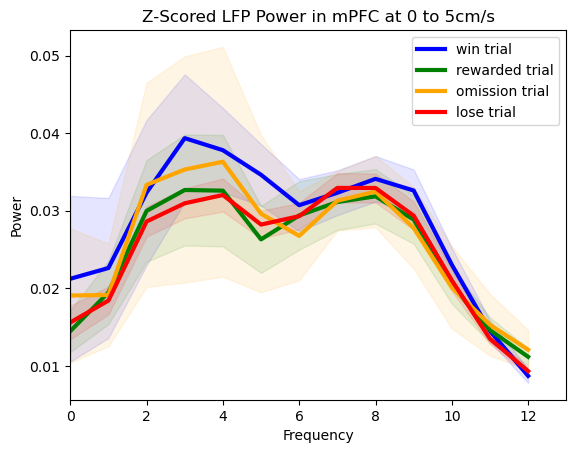

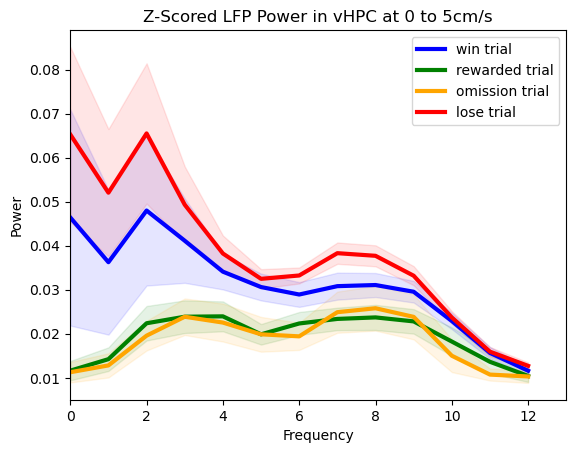

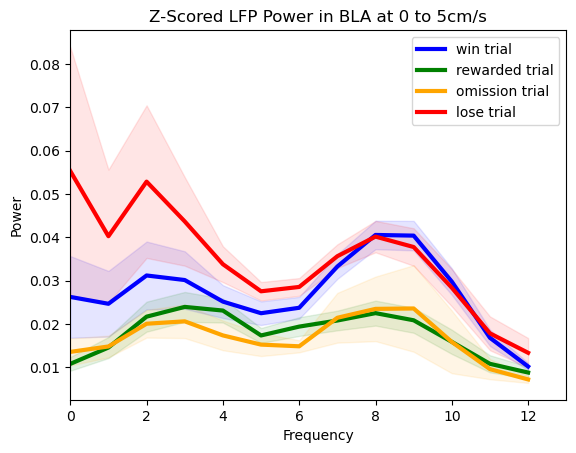

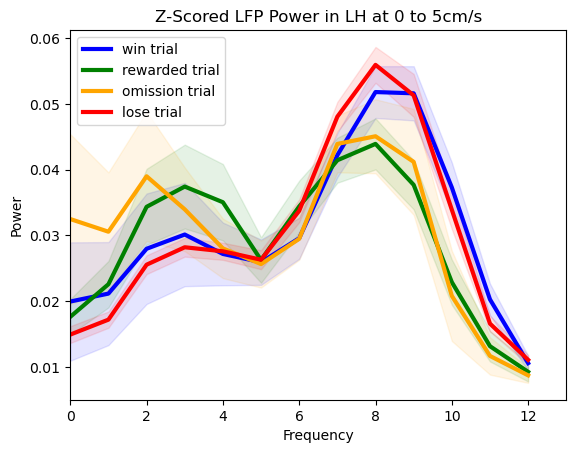

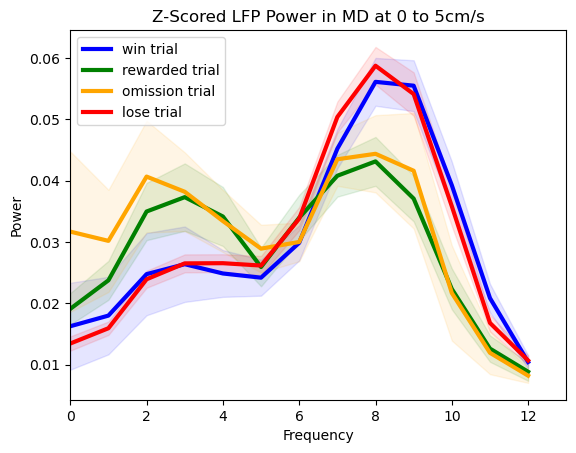

In [48]:
low_freq = 0
high_freq = 13
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

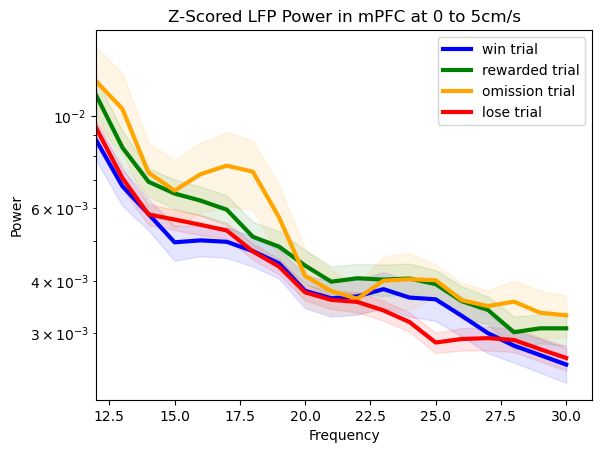

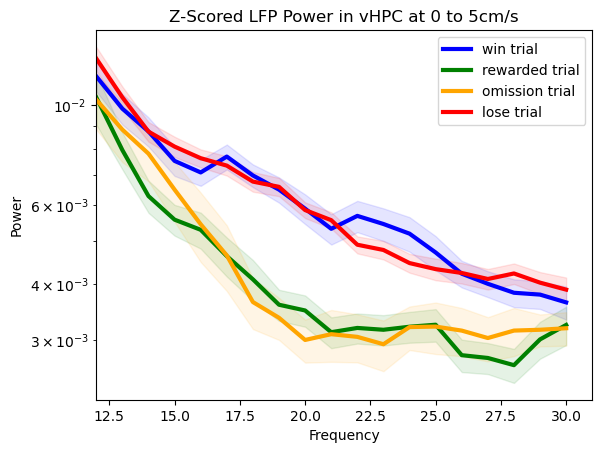

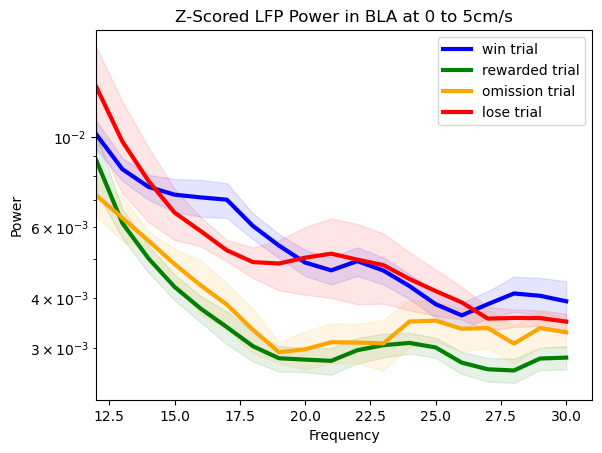

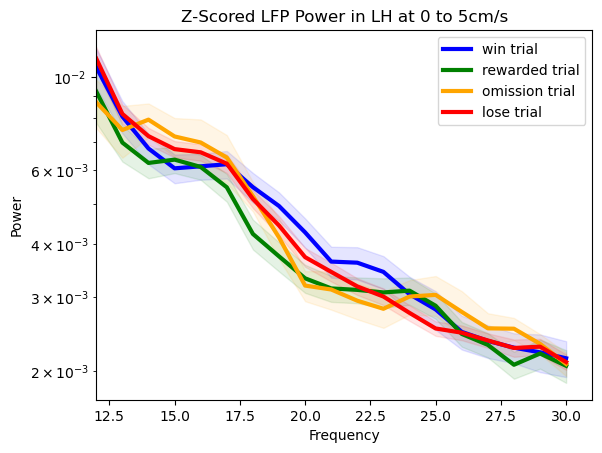

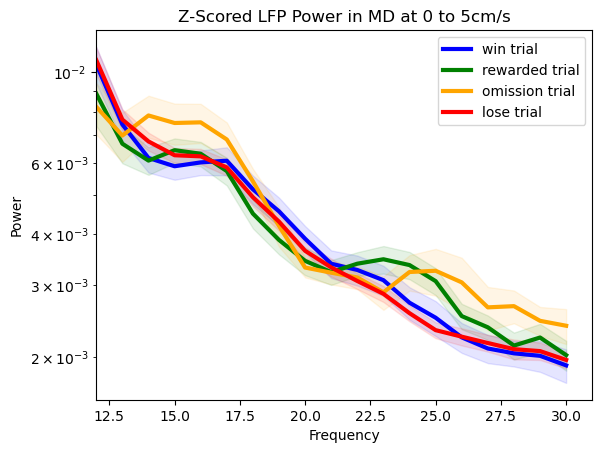

In [49]:
low_freq = 12
high_freq = 31
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

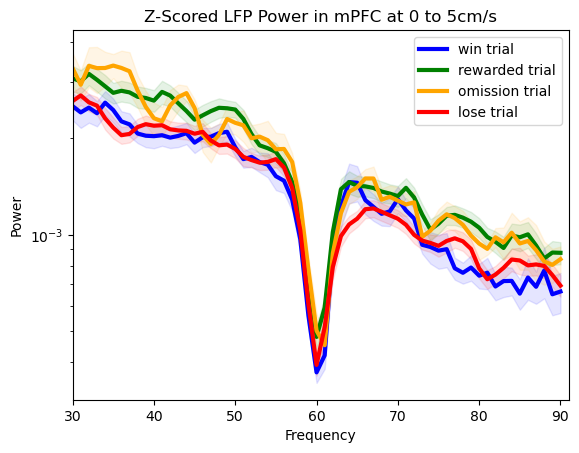

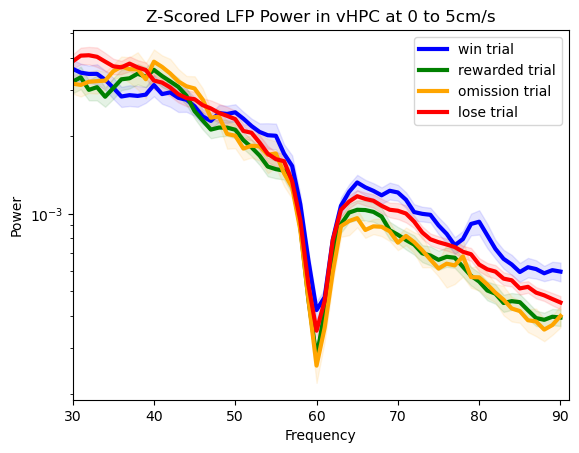

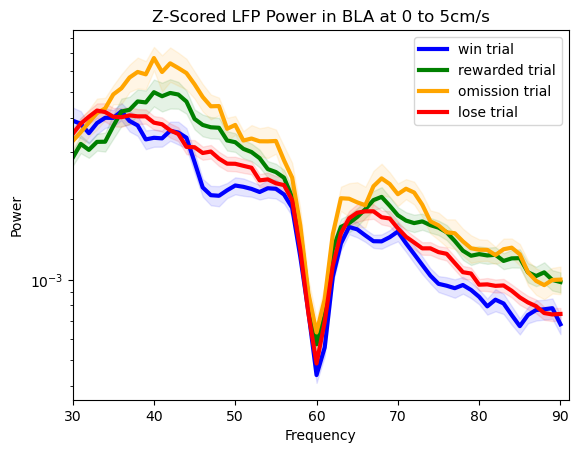

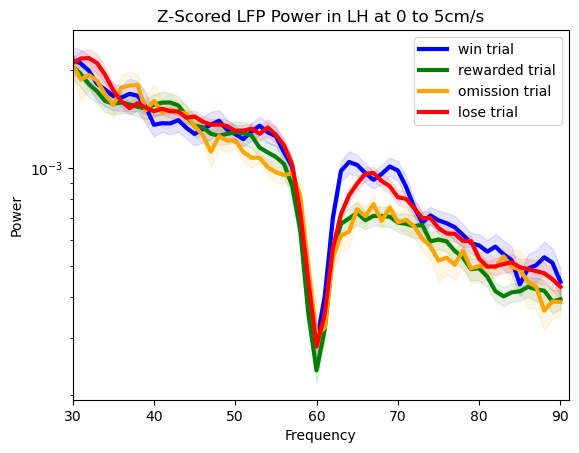

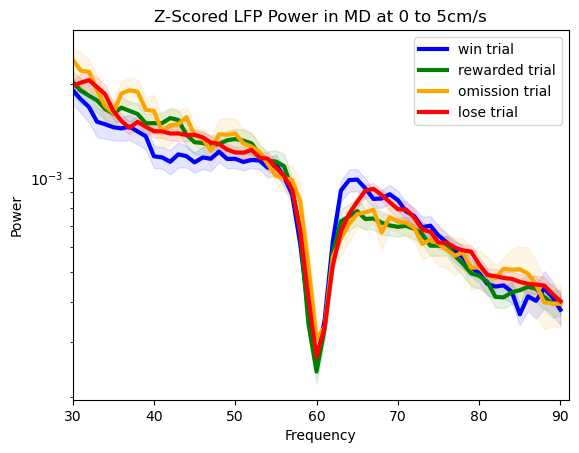

In [50]:
low_freq = 30
high_freq = 91
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

In [51]:
raise ValueError()

ValueError: 

# Exporting that data

In [ ]:
MERGED_LFP_AND_SLEAP.columns

In [ ]:
exported_lfp_and_sleap = MERGED_LFP_AND_SLEAP.drop(columns=trace_columns, errors="ignore").copy()
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "multitaper" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "thorax_velocity" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "frequencies" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "windowed_power" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "connectivity" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "spike_interface" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "index" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "stamp" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "box" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "height" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "width" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "ratio" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "width" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=['individual_subj',
 'all_subj',
 'recording_name',
 'track_names',
 'subject_id',
 'corner_path',
 'corner_parts',
 'rescaled_locations',
 'reward_port'], errors="ignore")

In [ ]:
exported_lfp_and_sleap["frequencies"] = [MERGED_LFP_AND_SLEAP["BLA_baseline_frequencies"].iloc[0] for _ in range(len(exported_lfp_and_sleap))] 

In [ ]:
exported_lfp_and_sleap.columns

In [ ]:
exported_lfp_and_sleap.to_pickle("./proc/rce_lfp_power_and_velocity_region_col_baselinetrial_row.pkl")

In [ ]:
exported_lfp_and_sleap

# Reformatting the data

In [ ]:
window_averaged_power_columns

In [ ]:
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "all_window" in col], errors="ignore")


In [ ]:
exported_lfp_and_sleap = pd.melt(exported_lfp_and_sleap, value_vars=window_averaged_power_columns, value_name="power", id_vars=[col for col in exported_lfp_and_sleap.columns if col not in window_averaged_power_columns], var_name="region_and_baseline_or_trial")



In [ ]:
exported_lfp_and_sleap["brain_region"] = exported_lfp_and_sleap["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [ ]:
exported_lfp_and_sleap["trial_or_baseline"] = exported_lfp_and_sleap["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [ ]:
exported_lfp_and_sleap.head()

In [ ]:
exported_lfp_and_sleap["all_theta_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[4:13])
exported_lfp_and_sleap["all_beta_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[13:31])
exported_lfp_and_sleap["all_gamma_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[30:91])
exported_lfp_and_sleap["mean_theta_power"] = exported_lfp_and_sleap["all_theta_power"].apply(lambda x: x.mean())
exported_lfp_and_sleap["mean_beta_power"] = exported_lfp_and_sleap["all_beta_power"].apply(lambda x: x.mean())
exported_lfp_and_sleap["mean_gamma_power"] = exported_lfp_and_sleap["all_gamma_power"].apply(lambda x: x.mean())

In [ ]:
exported_lfp_and_sleap.head()

In [ ]:
exported_lfp_and_sleap.to_pickle("./proc/rce_velocity_parsed_power_spectra_region_and_baselinetrial_rows.pkl")